In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
# Loading the CSV file
df = pd.read_csv('medical_students_dataset.csv')

# displaying first 5 rows
df.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [37]:
# data cleaning / preprocessing
# checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


In [38]:
# checking for missing values
df.isnull().sum()

,0
Student ID,20000
Age,20000
Gender,20000
Height,20000
Weight,20000
Blood Type,20000
BMI,20000
Temperature,20000
Heart Rate,20000
Blood Pressure,20000


In [39]:
df.describe() # to describe the information

,Student ID,Age,Height,Weight,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol
count,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,49974.042078,26.021561,174.947103,69.971585,23.338869,98.600948,79.503767,114.558033,184.486361
std,28879.641657,4.890528,14.447560,17.322574,7.033554,0.500530,11.540755,14.403353,37.559678
min,1.000000,18.000000,150.000041,40.000578,10.074837,96.397835,60.000000,90.000000,120.000000
25%,24971.750000,22.000000,162.476110,54.969838,17.858396,98.264750,70.000000,102.000000,152.000000
50%,49943.500000,26.000000,174.899914,69.979384,22.671401,98.599654,80.000000,115.000000,184.000000
75%,74986.000000,30.000000,187.464417,84.980097,27.997487,98.940543,90.000000,127.000000,217.000000
max,100000.000000,34.000000,199.998639,99.999907,44.355113,100.824857,99.000000,139.000000,249.000000


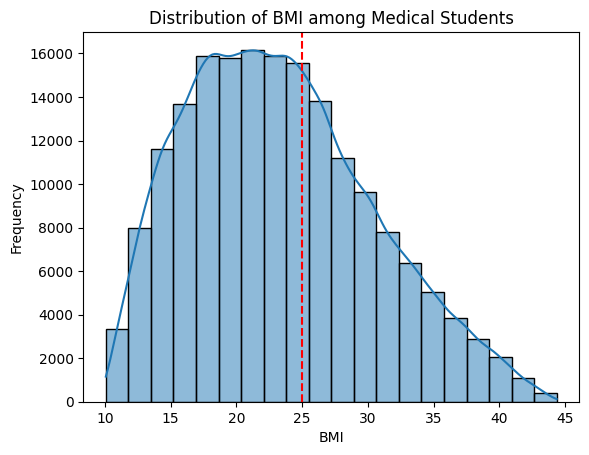

In [40]:
# Visualization
# Distribution of BMI
# Are Students mostly in a healthy range
# Here we see that the high frequency is in the 20-25 range,
# meaning that its considered within the normal weight range,
# and we see that it starts to decrease in the 30 range, but we still
# have a big amount in that 30 range. This means a higher frequency in this
# range suggests that most of the students in this dataset have either a
# normal BMI or are overweight, which is very common in general populations.
sns.histplot(df['BMI'], kde=True, bins=20)
plt.axvline(x=25, color='r', linestyle='--', label="Overweight Threshold (BMI=25)")
plt.title('Distribution of BMI among Medical Students')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [41]:
# High frequency in the 20-30 range generally means that most students
# are either normal weight or overweight.
# It reflects the common BMI distribution found in many populations.
# Understanding the trend is important because it may influence
# the type of health education or interventions you provide, especially when
# it comes to preventing obesity or related diseases.

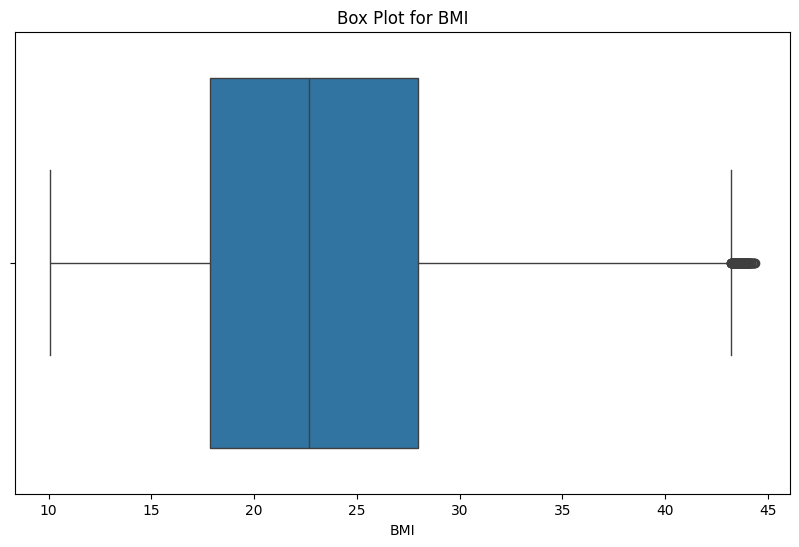

In [42]:
# Box Plot for BMI to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['BMI'])
plt.title('Box Plot for BMI')
plt.show()

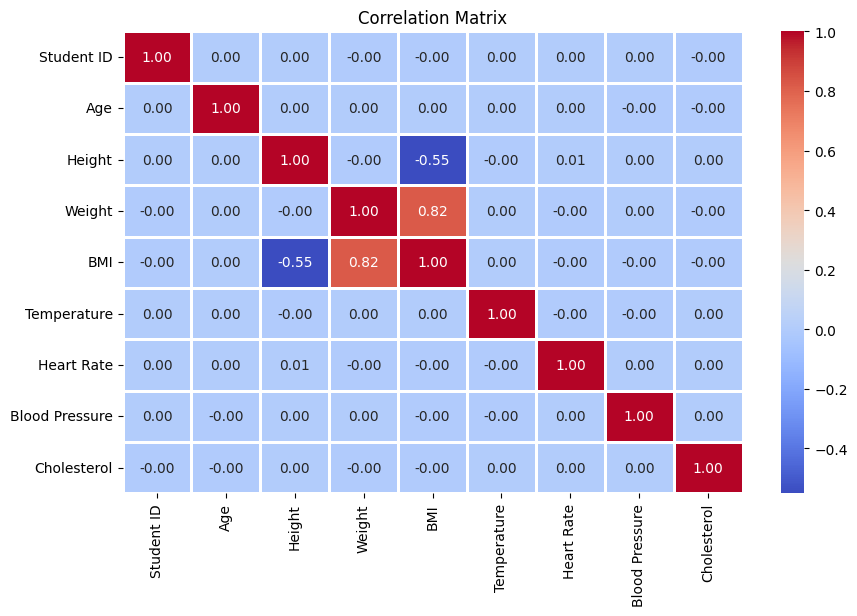

In [43]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title('Correlation Matrix')
plt.show()

In [44]:
# For our datasets -  medical_students_dataset.csv
# More Data Preprocessing
# Normalization / Standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_numeric_scaled = scaler.fit_transform(df_numeric)
df_scaled = pd.DataFrame(df_numeric_scaled, columns=df_numeric.columns)

# Show the first 5 rows of the scaled data
print("First 5 rows of standardized (scaled) data:")
df_scaled.head()

First 5 rows of standardized (scaled) data:


,Student ID,Age,Height,Weight,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol
0,-1.730395,-1.640229,-0.911518,0.137587,0.612347,NaN,1.342744,-0.385886,0.492914
1,-1.730360,NaN,-1.583521,-1.289687,NaN,0.227817,1.169444,-0.733028,-0.572061
2,-1.730326,1.222456,0.525389,-0.821503,-0.939763,-0.680590,-0.303600,1.072112,0.839031
3,NaN,0.813501,0.495986,-0.383280,-0.603228,0.476809,1.689342,-0.177600,-1.157797
4,-1.730256,-0.617841,NaN,-1.370320,NaN,-0.241625,1.342744,NaN,1.238396


In [45]:
# To ensure that all numeric features contribute equally during analysis and potential modeling, we applied
# standardization using the StandardScaler from scikit-learn. This transformation centers each feature around a
# mean of 0 and scales it to unit variance.
# This step is particularly important for algorithms sensitive to the scale of input data, such as k-nearest
# neighbors or principal component analysis.

In [46]:
X = df_numeric.drop('BMI', axis=1)
y = df_numeric['BMI']

# Combining features and target to drop rows with NaNs in either
df_model = pd.concat([X, y], axis=1).dropna()

# Redefine X and y from the cleaned dataset
X = df_model.drop('BMI', axis=1)
y = df_model['BMI']

In [47]:
# Here is a simple ML Model to predict BMI using features like weight, cholestrol and heart rate of the patient.
# We are going to use Linear Regression which would suit for us, checking the health metrics.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaulate
y_pred = model.predict(X_test)
mean_square = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mean_square:.2f}')

Mean Squared Error: 1.13


this value above tells us how far the model predictions are from the actual BMI value.
In this case 1.13 is low for BMI, depending on the BMI scale of ages range 18-40, so the model has decent accuracy.

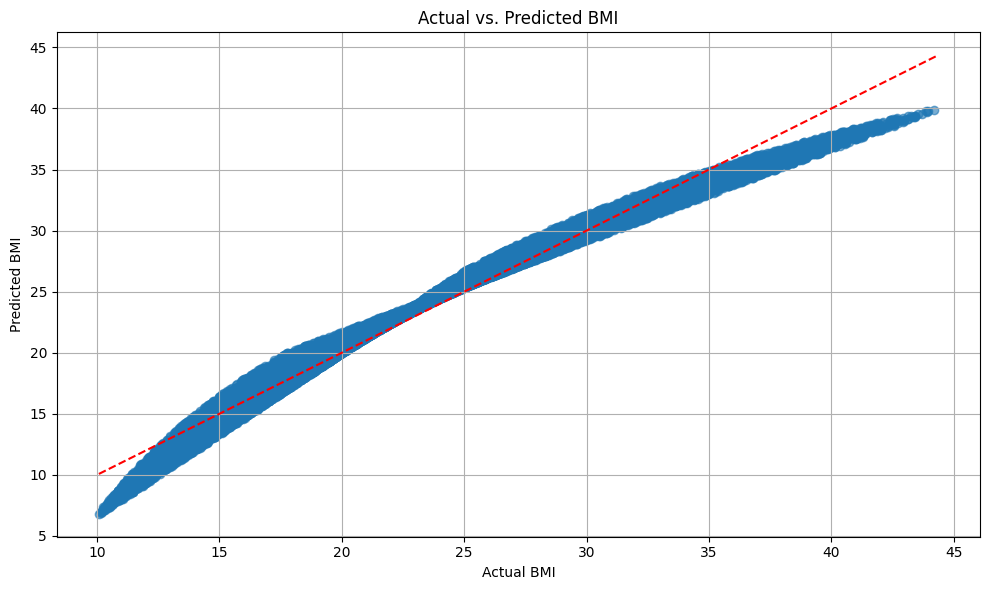

In [48]:
# adding a plot or the django page

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual BMI")
plt.ylabel("Predicted BMI")
plt.title("Actual vs. Predicted BMI")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--') # line y=x
plt.grid(True)
plt.tight_layout()

plt.savefig("bmi_predict.png") # image will be used in the webapp
plt.show()